In [1]:
import pandas as pd

Data from [Economic Tracker](https://tracktherecovery.org) and [the accompanying paper](https://opportunityinsights.org/wp-content/uploads/2020/05/tracker_paper.pdf)

In [2]:
df = pd.read_csv("../data/Womply - County - Weekly.csv", dtype={"countyfips":object, "merchants_all":float})

In [3]:
df.head()

,countyfips,merchants_all,date
0,01001,0.0332,1/11/20
1,01003,0.0144,1/11/20
2,01009,-0.0203,1/11/20
3,01013,-0.0247,1/11/20
4,01015,-0.0354,1/11/20


In [4]:
df["date"] = pd.to_datetime(df.date)

In [5]:
df = df.dropna()

In [6]:
df = df.sort_values(by="date").drop_duplicates(subset=["countyfips"], keep="last")

In [7]:
df = df.filter(["countyfips", "merchants_all"])

In [8]:
df["merchants_all"] = df["merchants_all"] * 100

In [9]:
df.head()

,countyfips,merchants_all
79064,19089,-39.70
94546,31177,-1.01
94545,31159,-5.51
94542,31145,-1.59
94541,31141,-19.20


In [10]:
df['countyfips'].count()

1920

In [11]:
df.rename(columns={'merchants_all': 'Percent Change in Number of Small Businesses Open'}, inplace=True)


array([[<AxesSubplot:title={'center':'Percent Change in Number of Small Businesses Open'}>]],
      dtype=object)

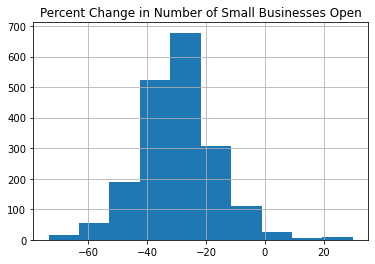

In [12]:
df.hist()

In [13]:
# Read in data 
data = pd.read_csv('../data/merged_data.csv', dtype={'FIPS': object})
data = data.drop([data.columns[0],"countycode"], axis=1)
data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Veterans in Civilian Adult Population,opioid death rate,% Below Poverty,Median Household Income,% No College Degree,Unemployment Rate,% Not in Labor Force,% Jobs in Leisure and Hospitality,% Part-time,% Self-Employed
0,01001,Alabama,Autauga,791,8128.59119,20.882987,4.743889,4.654031,8.619529,18.081557,...,12.283,8.992644,12.1,58233.0,16.107796,2.7,40.454576,14.216260,39.604710,7.283256
1,01003,Alabama,Baldwin,2967,7354.12253,17.509134,4.224519,4.304056,8.345003,17.489033,...,11.938,6.421370,10.1,59871.0,21.044656,2.7,43.511495,20.823355,40.364194,12.669969
2,01005,Alabama,Barbour,472,10253.57340,29.591802,5.430279,5.185594,11.474559,21.999985,...,7.672,20.095655,27.1,35972.0,7.609664,3.8,58.630549,9.248695,54.696722,9.675502
3,01007,Alabama,Bibb,471,11977.53948,19.439724,4.591482,4.551699,10.308710,19.114200,...,7.152,22.321429,20.3,47918.0,6.451014,3.1,53.033744,4.345937,52.112959,7.547395
4,01009,Alabama,Blount,1085,11335.07113,21.745293,4.860808,4.891455,7.604563,19.208672,...,8.532,8.644537,16.3,52902.0,8.625066,2.7,44.821051,10.342057,47.550659,7.815851


In [14]:
# Change to a dummy variable
data["Presence of Water Violation (dummy Y/N)"] = pd.get_dummies(data["Presence of Water Violation"])["Yes"]

# Remove ":1"
data["Other Primary Care Provider Ratio (:1)"] = data["Other Primary Care Provider Ratio"].str.split(":").apply(lambda x: x[0])

In [15]:
# Drop original columns
data = data.drop("Presence of Water Violation", axis=1)
data = data.drop("Other Primary Care Provider Ratio", axis=1)

In [16]:
df = df.merge(data, left_on='countyfips',right_on='FIPS')
df.head()

,countyfips,Percent Change in Number of Small Businesses Open,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,...,% Below Poverty,Median Household Income,% No College Degree,Unemployment Rate,% Not in Labor Force,% Jobs in Leisure and Hospitality,% Part-time,% Self-Employed,Presence of Water Violation (dummy Y/N),Other Primary Care Provider Ratio (:1)
0,19089,-39.70,19089,Iowa,Howard,99,5608.073753,12.622644,3.160173,3.574778,...,9.6,58028.0,11.560510,2.8,26.448363,5.143541,31.287879,16.264805,0,1021
1,31177,-1.01,31177,Nebraska,Washington,195,4632.870334,11.720313,2.750393,3.175809,...,6.8,75197.0,21.067497,2.9,29.484214,6.721927,32.813006,12.265953,0,1148
2,31159,-5.51,31159,Nebraska,Seward,207,5410.847151,12.026406,2.968235,3.218111,...,7.2,72291.0,19.126991,2.9,34.388775,7.529180,33.000000,11.688027,0,4330
3,31145,-1.59,31145,Nebraska,Red Willow,137,6658.414878,14.776613,3.288232,3.690134,...,12.0,50260.0,11.779891,2.8,32.797243,11.402280,34.854962,16.237970,0,825
4,31141,-19.20,31141,Nebraska,Platte,309,5279.823593,14.422556,3.001068,3.286868,...,9.0,62804.0,14.510795,2.9,30.711008,7.532143,31.196560,10.707512,1,2085


In [17]:
df = df.drop("countyfips", axis=1)

In [18]:
df["FIPS"].count()

1921

In [19]:
df.to_csv('../data/business_closures_data.csv', index=False)